In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:

data.shape

(4340, 8)

In [ ]:
for column in ['owner','transmission','seller_type','fuel','year']:
  print(column,':',data[column].unique())

owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
transmission : ['Manual' 'Automatic']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
year : [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]


In [ ]:
column_to_remove = 'name'

# Drop the specified column
df = data.drop(columns=[column_to_remove])

In [ ]:
le = preprocessing.LabelEncoder()
df['year'] = le.fit_transform(df['year'])
df['selling_price'] = le.fit_transform(df['selling_price'])
df['km_driven'] = le.fit_transform(df['km_driven'])
df['owner'] = le.fit_transform(df['owner'])
df['transmission'] = le.fit_transform(df['transmission'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,13,17,474,4,1,1,0
1,13,60,335,4,1,1,0
2,18,236,607,1,1,1,0
3,23,114,309,4,1,1,0
4,20,193,681,1,1,1,2


In [ ]:
X = df[['selling_price', 'km_driven']]
y = df[['year', 'selling_price', 'km_driven', 'seller_type', 'owner', 'transmission']]

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[219771896.429263,
 84749160.12936291,
 60018442.18949412,
 47737040.93968809,
 38960748.454263,
 31462614.087286845,
 27006660.329500586,
 23792277.37042531,
 21045549.23805323,
 19182315.192942243]

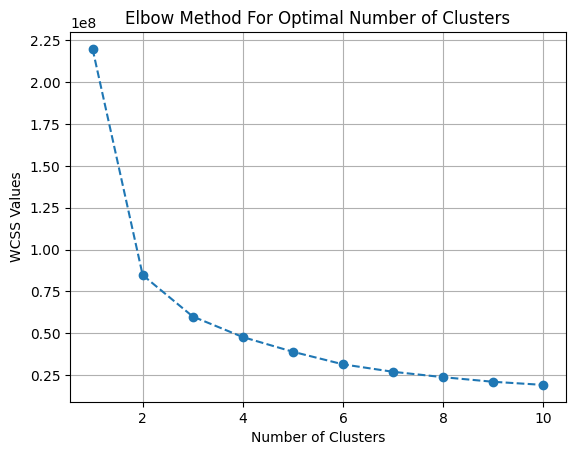

In [ ]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.grid(True)
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans_model.fit_predict(X)

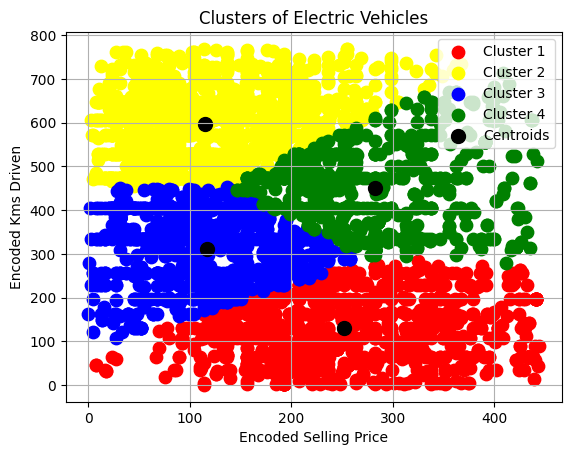

In [ ]:
m = np.array(X)
plt.scatter(m[y_kmeans == 0, 0], m[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(m[y_kmeans == 1, 0], m[y_kmeans == 1, 1], s=80, c='yellow', label='Cluster 2')
plt.scatter(m[y_kmeans == 2, 0], m[y_kmeans == 2, 1], s=80, c='blue', label='Cluster 3')
plt.scatter(m[y_kmeans == 3, 0], m[y_kmeans == 3, 1], s=80, c='green', label='Cluster 4')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Clusters of Electric Vehicles')
plt.xlabel('Encoded Selling Price')
plt.ylabel('Encoded Kms Driven')
plt.legend()
plt.grid(True)
plt.show()

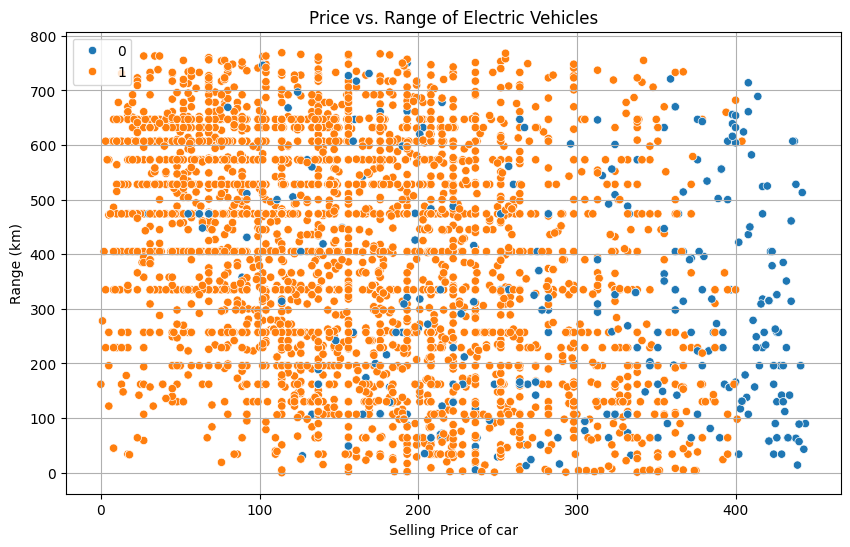

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='selling_price', y='km_driven', hue='transmission')
plt.title('Price vs. Range of Electric Vehicles')
plt.xlabel('Selling Price of car')
plt.ylabel('Range (km)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-18-4354b17c1f24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='owner',palette="Paired")


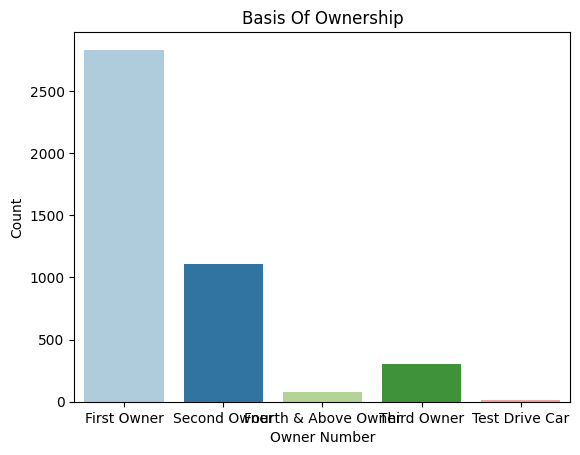

In [ ]:
sns.countplot(data=data, x='owner',palette="Paired")
plt.title("Basis Of Ownership")
plt.xlabel('Owner Number')
plt.ylabel('Count')
plt.show()

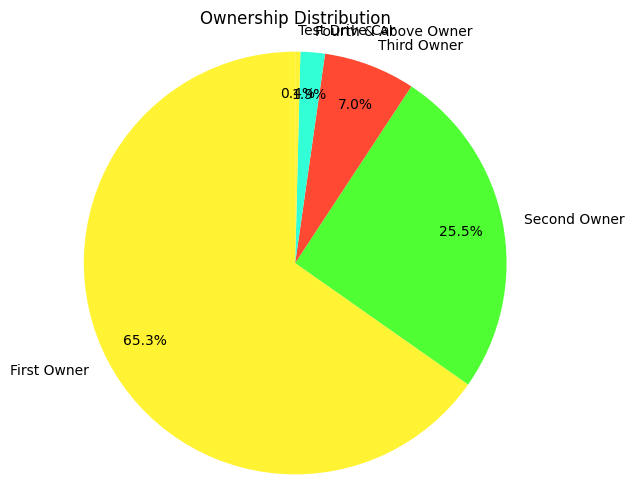

In [ ]:
owner_counts = data['owner'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
colors = ['#FFF333','#4FFF33','#FF4933','#33FFD7']
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(owner_counts,colors = colors, labels=owner_counts.index, autopct='%1.1f%%', startangle=90,pctdistance=0.80)
plt.title('Ownership Distribution')
plt.axis('equal')
plt.show()

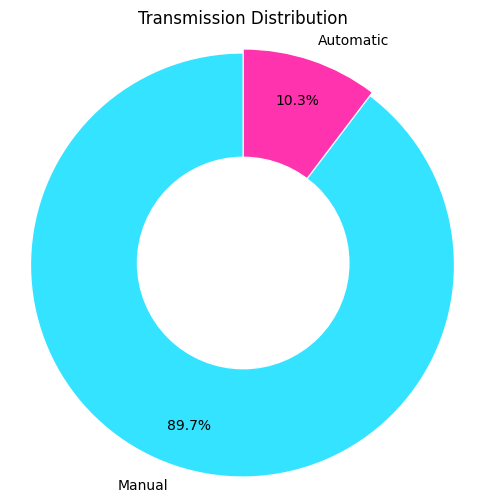

In [ ]:
transmission_counts = data['transmission'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
colors = ['#33E3FF','#FF33AD']
explode = (0.01,0.01)
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(transmission_counts,colors = colors, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90,pctdistance=0.80,explode=explode)
plt.title('Transmission Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<ipython-input-21-be26a68b3f3f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='seller_type',palette="Paired")


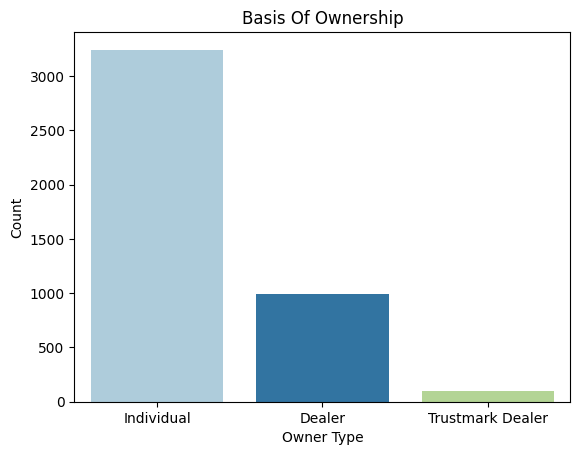

In [ ]:
sns.countplot(data=data, x='seller_type',palette="Paired")
plt.title("Basis Of Ownership")
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.show()

<ipython-input-22-51a8347a1208>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='Set2')


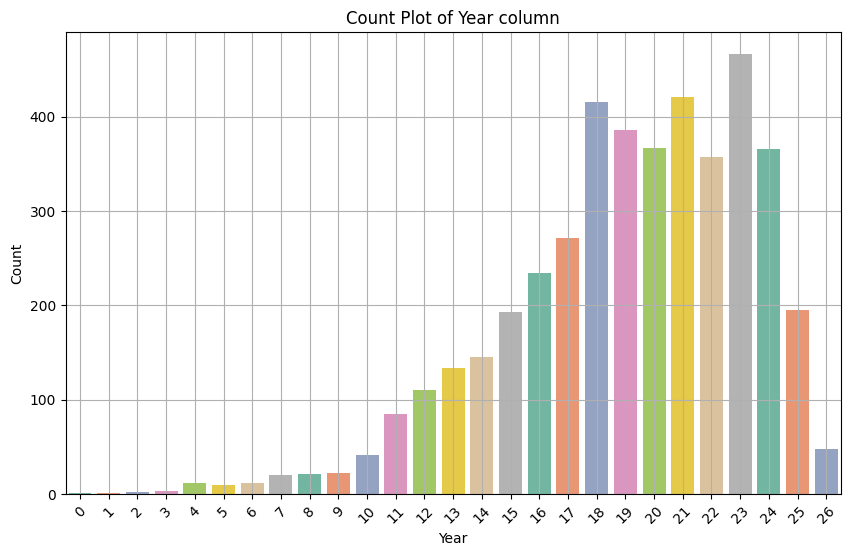

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', palette='Set2')
plt.title('Count Plot of Year column')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
X = df.drop('selling_price', axis=1)  # Drop the target column
y = df['km_driven']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Select the number of components that explain most of the variance (e.g., 95%)
num_components = 0
explained_variance_sum = 0
for i, ratio in enumerate(explained_variance_ratio):
    explained_variance_sum += ratio
    if explained_variance_sum >= 0.95:
        num_components = i + 1
        break

# Select the top features based on the selected number of components
top_features = X.columns[:num_components]

print("Selected top features:", top_features)

Selected top features: Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
# Contains an array of explained variance ratios for each principal component.
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.81991656 0.17985534]
Cumulative variance explained by 2 principal components: 99.98%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


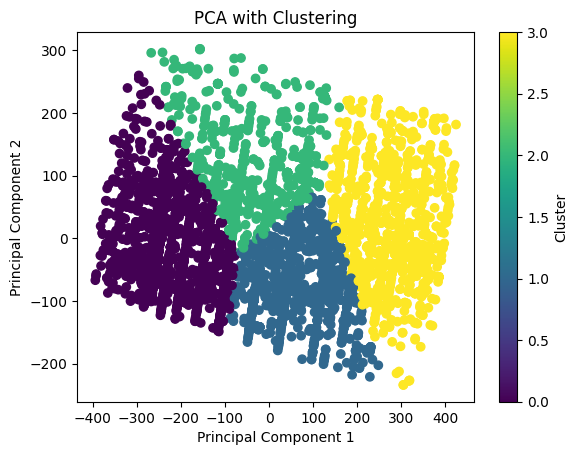

PCA Projection Axes:
[[ 1.15180970e-02  2.06676905e-01 -9.78336954e-01  1.89721746e-03
  -3.34826636e-04 -2.71660306e-04 -2.23806872e-03]
 [ 2.02724995e-02  9.78122677e-01  2.06860036e-01 -8.19840339e-03
  -5.12779004e-04 -1.23277770e-03 -2.23232770e-03]]


In [ ]:
# Perform clustering (for example, using KMeans with 3 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
# n_clusters specifies the number of clusters to create, and random_state is used to ensure reproducibility of the results.
clusters = kmeans.fit_predict(df)

# Plot the PCA results with different colors for each cluster
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
# c=clusters argument assigns a different color to each cluster in the plot, using the 'viridis' colormap.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Display projection axes (principal components)
print("PCA Projection Axes:")
# An attribute of the PCA instance that holds the principal components as row vectors
print(pca.components_)